In [8]:
import requests
from bs4 import BeautifulSoup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import font_manager, rc

# 나눔 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 한글 폰트 파일 경로에 맞게 수정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

import numpy as np
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from IPython.display import display

# pip install selenium beautifulsoup4 pandas
# pip install selenium
# !pip install webdriver_manager


# KBO 홈페이지 에서 순위표 가져오기

,순위,팀명,경기,승,패,무,승률,게임차,최근10경기,연속,홈,방문
0,1,KIA,123,73,48,2,0.603,0.0,8승0무2패,2승,32-1-26,41-1-22
1,2,삼성,124,68,54,2,0.557,5.5,8승0무2패,3승,36-0-28,32-2-26
2,3,LG,122,64,56,2,0.533,8.5,4승0무6패,1패,33-1-26,31-1-30
3,4,두산,126,64,60,2,0.516,10.5,5승0무5패,2승,33-1-29,31-1-31
4,5,KT,124,60,62,2,0.492,13.5,6승0무4패,1승,27-1-30,33-1-32
5,6,한화,120,57,61,2,0.483,14.5,8승0무2패,1승,27-2-33,30-0-28
6,7,SSG,123,58,64,1,0.475,15.5,2승0무8패,2패,29-1-31,29-0-33
7,8,롯데,117,52,62,3,0.456,17.5,4승0무6패,1패,31-2-23,21-1-39
8,9,NC,119,52,65,2,0.444,19.0,3승0무7패,2패,29-0-30,23-2-35
9,10,키움,122,53,69,0,0.434,20.5,4승0무6패,2패,30-0-38,23-0-31


2024년 8월 28일 기준


,순위,팀명,경기,승,패,무,승률,게임차,최근10경기,연속,홈,방문,color
0,1,KIA,123,73,48,2,0.603,0.0,8승0무2패,2승,32-1-26,41-1-22,red
1,2,삼성,124,68,54,2,0.557,5.5,8승0무2패,3승,36-0-28,32-2-26,blue
2,3,LG,122,64,56,2,0.533,8.5,4승0무6패,1패,33-1-26,31-1-30,"(0.9295040369088812, 0.9295040369088812, 0.929..."
3,4,두산,126,64,60,2,0.516,10.5,5승0무5패,2승,33-1-29,31-1-31,navy
4,5,KT,124,60,62,2,0.492,13.5,6승0무4패,1승,27-1-30,33-1-32,black
5,6,한화,120,57,61,2,0.483,14.5,8승0무2패,1승,27-2-33,30-0-28,"(1.0, 0.4980392156862745, 0.0)"
6,7,SSG,123,58,64,1,0.475,15.5,2승0무8패,2패,29-1-31,29-0-33,"(0.8370472895040368, 0.13394848135332565, 0.13..."
7,8,롯데,117,52,62,3,0.456,17.5,4승0무6패,1패,31-2-23,21-1-39,"(0.8782929642445213, 0.31990772779700116, 0.02..."
8,9,NC,119,52,65,2,0.444,19.0,3승0무7패,2패,29-0-30,23-2-35,"(0.16696655132641292, 0.48069204152249134, 0.7..."
9,10,키움,122,53,69,0,0.434,20.5,4승0무6패,2패,30-0-38,23-0-31,"(0.5019607843137255, 0.0, 0.12549019607843137)"


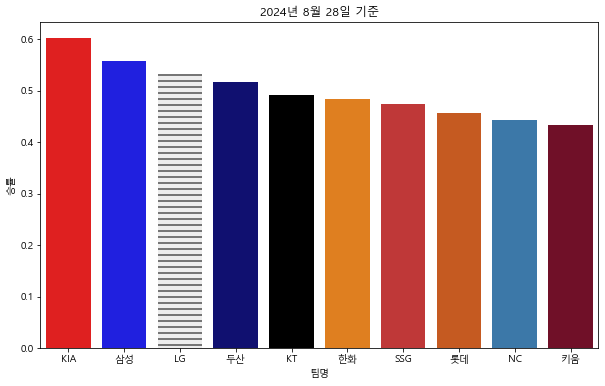

In [9]:
# URL 설정
url = 'https://www.koreabaseball.com/Record/TeamRank/TeamRankDaily.aspx'
response = requests.get(url)

if response.status_code == 200:
    # BeautifulSoup 객체 생성
    soup = BeautifulSoup(response.text, 'html.parser')
    rows = soup.find_all('tr')

# 데이터를 저장할 리스트를 생성합니다.
data = []

# 테이블의 각 행에 대해서
for row in rows:
    # 행에서 <th> 또는 <td> 태그(테이블의 셀)를 찾습니다.
    cols = row.find_all(['th', 'td'])
    # 셀의 텍스트만 추출하여 리스트로 만듭니다.
    cols = [ele.text.strip() for ele in cols]
    data.append(cols)  # 데이터 리스트에 행 데이터를 추가합니다.

# 첫 번째 행을 헤더로 설정합니다.
headers = data[0] if data else []

# 데이터를 필터링하여 list2를 생성합니다.
list2 = []

for item in data[1:]:
    try:
        number = int(item[0])
        list2.append(item)
    except ValueError:
        # ValueError 발생 시 (예: 정수로 변환할 수 없는 문자열이 item인 경우)
        pass  # 아무 것도 하지 않음

# CSV 파일로 저장할 때 첫 번째 행을 헤더로 포함합니다.
with open('team_rank.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    if headers:
        writer.writerow(headers)  # 컬럼 헤더를 먼저 씁니다.
    writer.writerows(list2)       # 데이터를 씁니다.


data = pd.read_csv('team_rank.csv')
display(data)



# 웹 드라이버 설정
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# 웹 페이지 열기
driver.get("https://www.koreabaseball.com/Default.aspx")  # 원하는 경기 preview 홈페이지 링크 입력
# 페이지 로딩을 위해 잠시 대기 (필요시 명시적으로 기다림)
driver.implicitly_wait(10)

try:
    # 'id'가 'lblTeamRank'이고 'class'가 'sub-script'인 요소를 찾기
    date_div = driver.find_element(By.CSS_SELECTOR, "p#lblTeamRank.sub-script")
    
    # 텍스트 추출
    date_data = date_div.text
    print(date_data)  # 데이터를 확인합니다.

except Exception as e:
    print("지정한 요소를 찾을 수 없습니다.")
    print(e)

# 브라우저 닫기
driver.quit()

###



## 팀 상징 색에 맞추기 위한 색상 선정 및 할당

palette1 = sns.color_palette('PuBu')

# sns.palplot(palette1)

palette11 = sns.color_palette('Greys')

# sns.palplot(palette11)

palette0 = sns.color_palette('Oranges')

# sns.palplot(palette0)

palette2 = sns.color_palette('Set1')

# sns.palplot(palette2)

palette22 = sns.color_palette('Reds')

# sns.palplot(palette22)

palette3 = sns.color_palette('Blues')

# sns.palplot(palette3)

palette4 = sns.color_palette('Set2')

# sns.palplot(palette4)

palette222 = sns.color_palette(["#800020"])  # 버건디 색상 팔레트 생성
# sns.palplot(palette222)

team_color_map = {
    'KIA': 'red',
    '삼성': 'blue',
    'LG': palette11[0],
    '두산': 'navy',
    'KT': 'black',
    'SSG': palette22[4],
    '한화': palette2[4],
    '롯데': palette0[4],
    'NC': palette3[4],
    '키움': palette222[0]
}

# 팀별 색상 정보를 데이터 프레임에 추가
data['color'] = data['팀명'].map(team_color_map)
display(data)


## 순위표 시각화

# 데이터 읽기
data = data

# barplot 그리기
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=data, x='팀명', y='승률', palette=data['color'])

ax.patches[2].set_hatch('--')  # 3번째 막대에 스트라이프 패턴

plt.xlabel('팀명')
plt.ylabel('승률')
plt.title(date_data)
plt.xticks(rotation=0)  # x축 레이블 회전
plt.show()


## 네이버 스포츠 링크 크롤링

['양팀 정보', 'KT', '5위60승2무62패', 'VS', 'LG', '3위64승2무56패', '양팀 전력 비교', 'KT', '구분', 'LG', '승승패패승', '최근경기', '패승패승패', '0.492', '승률', '0.533', '0.275', '타율', '0.281', '5.11', '평균자책', '4.64', '6승0무8패', '상대전적', '8승0무6패']


,팀명,순위/기록,VS,팀명,순위/기록
Info,KT,5위60승2무62패,VS,LG,3위64승2무56패


,KT,양팀 정보,LG
0,승승패패승,최근경기,패승패승패
1,0.492,승률,0.533
2,0.275,타율,0.281
3,5.11,평균자책,4.64
4,6승0무8패,상대전적,8승0무6패


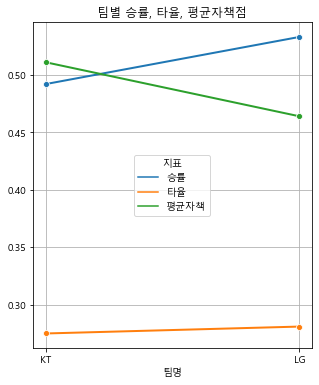

양팀 정보,팀명,최근경기,승률,타율,평균자책,상대전적
0,KT,승승패패승,0.492,0.275,0.511,6승0무8패
1,LG,패승패승패,0.533,0.281,0.464,8승0무6패


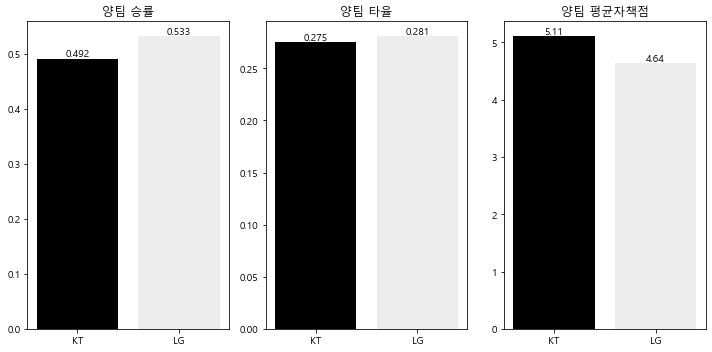

양팀 정보,팀명,최근경기,승률,타율,평균자책,상대전적
0,KT,승승패패승,0.492,0.275,5.11,6승0무8패
1,LG,패승패승패,0.533,0.281,4.64,8승0무6패


In [10]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from IPython.display import display

# 웹 드라이버 설정
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# 웹 페이지 열기
driver.get("https://m.sports.naver.com/game/20240829KTLG02024/preview")  # 원하는 경기 preview 홈페이지 링크 입력
# 페이지 로딩을 위해 잠시 대기 (필요시 명시적으로 기다림)
driver.implicitly_wait(10)

try:
    team_power_div = driver.find_element(By.CLASS_NAME, "TeamPower_comp_team_power___LgWg")
    
    # 텍스트 추출
    team_power_data = team_power_div.text.split('\n')
    print(team_power_data)  # 데이터를 확인합니다.

#     # 예제 데이터를 저장할 데이터프레임 생성 # 여기서 오류
#     df = pd.DataFrame([team_power_data], columns=["Rank", "Record", "Win Rate", "ERA", "Other Stats"])
#     print(df)

#     # 데이터프레임을 CSV 파일로 저장
#     df.to_csv("team_power_data.csv", index=False)

except Exception as e:
    print("지정한 div를 찾을 수 없습니다.")
    print(e)

# 브라우저 닫기
driver.quit()

###

# 추출된 데이터
t = team_power_data
# print(len(t))
# t

###

# 데이터를 나누어 데이터프레임으로 변환
team_info = {
    " ": ["팀명", "순위/기록", "VS", "팀명", "순위/기록"],
    "Info": [t[1], t[2], t[3], t[4], t[5]]
}
df_info = pd.DataFrame(team_info).T

# 첫 번째 행을 헤더로 사용
df_info.columns = df_info.iloc[0]
# 첫 번째 행을 제거하고 데이터만 남김
df_info = df_info[1:] 


###

team_comparison = {
    t[1]: [t[10], t[13], t[16], t[19], t[22]],
    t[0]: [t[11], t[14], t[17], t[20], t[23]],
    t[4]: [t[12], t[15], t[18], t[21], t[24]]
}

df_comparison = pd.DataFrame(team_comparison)

###

display(df_info)
display(df_comparison)

df = df_comparison.T
df.columns = df.iloc[1]
df = df.drop('양팀 정보').reset_index().rename(columns = {'index':'팀명'})
df

df['승률'] = pd.to_numeric(df['승률'], errors='coerce')
df['타율'] = pd.to_numeric(df['타율'], errors='coerce')
df['평균자책'] = pd.to_numeric(df['평균자책'], errors='coerce')



# 시각화를 위한 평균자책 * 0.1
df1 = df.copy()
df1['평균자책'] = df1['평균자책']*0.1


### 크롤링 데이터 시각화 - Lineplot

# 데이터 준비
df_melted = df1.melt(id_vars='팀명', value_vars=['승률', '타율', '평균자책'], 
                    var_name='지표', value_name='값')

# df_melted

# 선 그래프 그리기
plt.figure(figsize=(5, 6))
sns.lineplot(data=df_melted, x='팀명', y='값', hue='지표', marker='o', linewidth=2)

# 그래프에 제목과 레이블 추가
plt.title('팀별 승률, 타율, 평균자책점')
plt.xlabel('팀명')
plt.ylabel('')
plt.legend(title='지표', loc='center')

# 그래프 표시
plt.grid(True)
plt.show()
display(df1)

df12 = df.copy()

df12 = df12.merge(data[['팀명', 'color']], on='팀명', how='left')
df12

matched_color = data[data['팀명'].isin(df12['팀명'])][['팀명','color']]

df_add_color = df.copy()
df_add_color = pd.merge(df_add_color, matched_color, on='팀명', how='left')
# df_add_color

### 크롤링 데이터 시각화 Barplot

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



# 팀명과 승률, 타율, 평균자책점 추출
teams = df_add_color['팀명']
win_rates = df_add_color['승률']
batting_averages = df_add_color['타율']
era = df_add_color['평균자책'].astype(float)

# 시각화
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

# 승률 그래프
bars = ax[0].bar(teams, win_rates, color=df_add_color['color'])
ax[0].set_title('양팀 승률')
ax[0].set_ylabel('')

# 승률 바 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom')

# 타율 그래프
bars = ax[1].bar(teams, batting_averages, color=df_add_color['color'])
ax[1].set_title('양팀 타율')
ax[1].set_ylabel('')

# 타율 바 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom')

# 평균자책점 그래프
bars = ax[2].bar(teams, era, color=df_add_color['color'])
ax[2].set_title('양팀 평균자책점')
ax[2].set_ylabel('')

# 평균자책점 바 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    ax[2].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
display(df)

## 선발투수 전력비교


,KT,구분,LG
0,고영표,선발 선수 전력 비교,손주영
1,4승 6패,승패,8승 8패
2,72 1/3,이닝,118 2/3
3,5.35,평균 자책,4.02
4,1.70,WHIP,1.50
5,0승 0패 평균자책 0.00,상대전적,0승 2패 평균자책 7.20


,고영표,주구종,손주영
0,체인지업37%,비중,직구51%
1,117km/h,평균구속,144km/h
2,직구25%,비중,슬라이더23%
3,133km/h,평균구속,130km/h
4,커브16%,비중,커브14%
5,114km/h,평균구속,117km/h
6,그 외22%,비중,그 외12%


,KT,키플레이어 전력 비교,LG
0,오윤석,구분,박동원
1,0.270,타율,0.270
2,34,안타,96
3,4,홈런,16
4,17,타점,67
5,타율 0.346안타 9홈런 1,상대전적,타율 0.242안타 8홈런 2
6,타율 0.800안타 4홈런 1,최근5경기,타율 0.444안타 8홈런 0


,0,1,2,3,4
0,0.000,0.000,0.000,0.000,0.0
1,0.000,0.417,0.143,0.000,0.0
2,0.111,0.250,0.143,0.500,0.0
3,0.222,0.385,0.444,0.375,0.0
4,0.222,0.222,0.111,0.000,0.0


,0,1,2,3,4
0,0.111,0.111,0.1640,0.217,0.2170
1,0.111,0.179,0.2730,0.308,0.2170
2,0.111,0.410,0.4230,0.417,0.3145
3,0.111,0.109,0.2730,0.346,0.4120
4,0.111,0.111,0.2615,0.412,0.4120


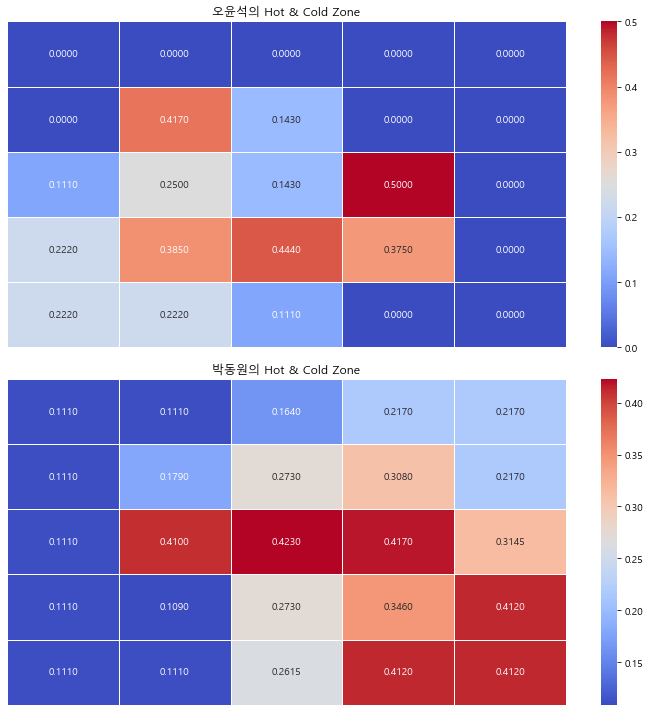

키플레이어는 팀의 최근 5경기 중 3경기 이상 출장 선수 중가장 타율이 높은 선수 입니다.


In [11]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from IPython.display import display

# 웹 드라이버 설정
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# 웹 페이지 열기
driver.get("https://m.sports.naver.com/game/20240829KTLG02024/preview")  # 여기에 실제 웹 페이지 URL을 넣으세요

# 페이지 로딩을 위해 잠시 대기 (필요시 명시적으로 기다림)
driver.implicitly_wait(10)

try:
    away_pitchname_div = driver.find_element(By.CLASS_NAME, "PlayerVS_away_team__6AbC_")
    home_pitchname_div = driver.find_element(By.CLASS_NAME, "PlayerVS_home_team__rY7Xa")
    
    startplayer_div = driver.find_element(By.CLASS_NAME, "StartPlayer_comp_player_table__1TGqp")
    pitch_of_kind_div = driver.find_element(By.CLASS_NAME, "StartPlayer_comp_player_pitch__3fuLQ")
    
    # 텍스트 추출
    away_pitch_name_data = away_pitchname_div.text.split('\n')
    home_pitch_name_data = home_pitchname_div.text.split('\n')
    
    # 선발 투수
    start_player_data = startplayer_div.text.split('\n')
    # 구종
    pitch_kind_data = pitch_of_kind_div.text.split('\n')
    
    
#     print(away_pitch_name_data)
#     print(home_pitch_name_data)
#     print(start_player_data)  # 데이터를 확인합니다.
#     print(pitch_kind_data)
    
except Exception as e:
    print("지정한 div를 찾을 수 없습니다.")
    print(e)

# 브라우저 닫기
driver.quit()

###

both_pitch_data = away_pitch_name_data + home_pitch_name_data + start_player_data
p = both_pitch_data

b = pitch_kind_data

# print(len(p))
# p

###

pitch_comparison = {
    p[3]: [p[0], p[6], p[9], p[12], p[15], p[18]],
    p[4]: [p[2], p[7], p[10], p[13], p[16], p[19]],
    p[5]: [p[1], p[8], p[11], p[14], p[17], p[20]]
}

df_pcomparison = pd.DataFrame(pitch_comparison)

ball_comparison = {
    b[1]: [b[2]+b[4]+ b[5], b[3], b[6]+ b[8]+ b[9], b[7], b[10]+b[12]+ b[13], b[11], b[14]+ b[15]+ b[16]],
    b[0]: ['비중', '평균구속','비중', '평균구속','비중', '평균구속','비중'],
    b[18]: [b[19]+b[21]+ b[22], b[20], b[23]+ b[25]+ b[26], b[24], b[27]+b[29]+ b[30], b[28], b[31]+ b[32]+ b[33]]
}

df_bcomparison = pd.DataFrame(ball_comparison)

###

display(df_pcomparison)
display(df_bcomparison)

## 키플레이어 전력 비교

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from IPython.display import display

# 웹 드라이버 설정
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# 웹 페이지 열기
driver.get("https://m.sports.naver.com/game/20240829KTLG02024/preview")  # 여기에 실제 웹 페이지 URL을 넣으세요

# 페이지 로딩을 위해 잠시 대기 (필요시 명시적으로 기다림)
driver.implicitly_wait(10)

##
# 모든 요소 찾기 - away_team,home_team 정보 가진 class
away_keyplayer_div = driver.find_elements(By.CLASS_NAME, "PlayerVS_away_team__6AbC_")

# 두 번째 요소 텍스트 추출
if len(away_keyplayer_div) >= 2:
    away_keyplayer_name_data = away_keyplayer_div[1].text.split('\n')
else:
    away_keyplayer_name_data = "두 번째 요소가 존재하지 않습니다."

# print(away_keyplayer_name_data)

## 

home_keyplayer_div = driver.find_elements(By.CLASS_NAME, "PlayerVS_home_team__rY7Xa")

if len(home_keyplayer_div) >= 2:
    home_keyplayer_name_data = home_keyplayer_div[1].text.split('\n')
else:
    home_keyplayer_name_data = "두 번째 요소가 존재하지 않습니다."

# print(home_keyplayer_name_data)

##

try:
    key_player_div = driver.find_element(By.CLASS_NAME, "TopPlayer_comp_player_table__1wL5X")
    
    # 텍스트 추출    
    key_player_data = key_player_div.text.split('\n')
#     print(key_player_data)  # 데이터를 확인합니다.

except Exception as e:
    print("지정한 div를 찾을 수 없습니다.")
    print(e)

# 브라우저 닫기
driver.quit()

###

both_keyplayer_data = away_keyplayer_name_data + home_keyplayer_name_data + key_player_data
k = both_keyplayer_data
# print(len(p))
# print(k)

###


keyplayer_comparison = {
    k[3]: [k[0], k[6], k[9], k[12], k[15], k[18]+k[19],k[23]+k[24]],
    '키플레이어 전력 비교': [k[4], k[7], k[10], k[13], k[16], k[20],k[25]+k[26]],
    k[5]: [k[1], k[8], k[11], k[14], k[17], k[21]+k[22],k[27]+k[28]]
}

df_kcomparison = pd.DataFrame(keyplayer_comparison)

###

display(df_kcomparison)

### 히트맵 추출 빌드업

# 웹 드라이버 설정
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# 웹 페이지 열기
driver.get("https://m.sports.naver.com/game/20240829KTLG02024/preview")  # 여기에 실제 웹 페이지 URL을 넣으세요

# 페이지 로딩을 위해 잠시 대기 (필요시 명시적으로 기다림)
driver.implicitly_wait(10)


try:
    both_zone_div = driver.find_element(By.CLASS_NAME, "TopPlayer_comp_square_chart__vlEy3")
    explain_keyplayer_div = driver.find_element(By.CLASS_NAME, "TopPlayer_chart_info__uchht")
    
    # 텍스트 추출
    both_zone_data = both_zone_div.text.split('\n')
    explain_keyplayer_data = explain_keyplayer_div.text.split('\n')
    
#     print(both_zone_data)
#     print("\n")
#     print(explain_keyplayer_data)
    keyplayer_mean = explain_keyplayer_data[0]+explain_keyplayer_data[1] 

except Exception as e:
    print("지정한 div를 찾을 수 없습니다.")
    print(e)

# 브라우저 닫기
driver.quit()

###
away_zone_data = both_zone_data[1:28]
home_zone_data = both_zone_data[29:]

# print("\n")
# print(both_zone_data[0])
# print("\n")
# print(away_zone_data)
# print("\n")
# print(home_zone_data)
# print("\n")

# print(keyplayer_mean)




# print(len(away_zone_data))
# print(away_zone_data)

# 짝수 인덱스의 값을 float형으로 변환
float_away_zone_data = [
    float(away_zone_data[i]) if i % 2 == 1 and away_zone_data[i].replace('.', '', 1).isdigit() else away_zone_data[i]
    for i in range(len(away_zone_data))
]

# print(float_away_zone_data) 


az =float_away_zone_data 

away_zone = {
    "0": [az[1],           az[1], (az[1]+az[5])/2, az[5], az[5]],
    "1": [az[1],           az[9], az[15],          az[21], az[5]],
    "2": [(az[1]+az[3])/2, az[11], az[17],         az[23], (az[5]+az[7])/2],
    "3": [az[3],           az[13], az[19],         az[25], az[7]],
    "4": [az[3],           az[3], (az[3]+az[7])/2, az[7], az[7]]
}


away_hc_zone = pd.DataFrame(away_zone)
display(away_hc_zone)


# print(len(home_zone_data))
# print(home_zone_data)

# 짝수 인덱스의 값을 float형으로 변환
float_home_zone_data = [
    float(home_zone_data[i]) if i % 2 == 0 and home_zone_data[i].replace('.', '', 1).isdigit() else home_zone_data[i]
    for i in range(len(home_zone_data))
]

# print(float_home_zone_data) 

hz =float_home_zone_data 

# 중앙에 위치한 값 ex) 1 by 3 ,3 by 1 , 5 by 3 , 3 by 5 = (왼바깥 + 오른 바깥) / 2
home_zone = {
    "0": [hz[0],           hz[0], (hz[0]+hz[4])/2, hz[4], hz[4]],
    "1": [hz[0],           hz[8], hz[14],          hz[20], hz[4]],
    "2": [(hz[0]+hz[2])/2, hz[10], hz[16],         hz[22], (hz[4]+hz[6])/2],
    "3": [hz[2],           hz[12], hz[18],         hz[24], hz[6]],
    "4": [hz[2],           hz[2], (hz[2]+hz[6])/2, hz[6], hz[6]]
}



home_hc_zone = pd.DataFrame(home_zone)
display(home_hc_zone)

# 히트맵 그리기
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# 첫 번째 히트맵
sns.heatmap(away_hc_zone, cmap='coolwarm', annot=True, fmt='.4f', linewidths=0.5, xticklabels=False, yticklabels=False, ax=ax[0])
ax[0].set_title(f"{away_zone_data[-1]}의 Hot & Cold Zone")

# 두 번째 히트맵
sns.heatmap(home_hc_zone, cmap='coolwarm', annot=True, fmt='.4f', linewidths=0.5, xticklabels=False, yticklabels=False, ax=ax[1])
ax[1].set_title(f"{home_zone_data[-1]}의 Hot & Cold Zone")

plt.tight_layout()
plt.show()

print(keyplayer_mean)

# 최종 추출본

네이버 스포츠 - 야구 - 경기 전력 - 홈페이지 전부를 크롤링해서 시각화 해보았습니다


,팀명,순위/기록,VS,팀명,순위/기록
Info,KT,5위60승2무62패,VS,LG,3위64승2무56패


,KT,양팀 정보,LG
0,승승패패승,최근경기,패승패승패
1,0.492,승률,0.533
2,0.275,타율,0.281
3,5.11,평균자책,4.64
4,6승0무8패,상대전적,8승0무6패


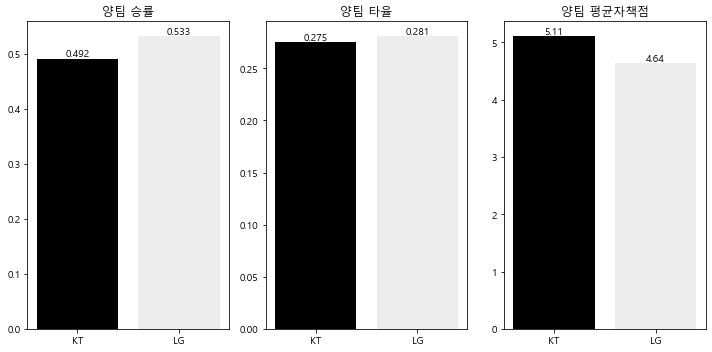

양팀 정보,팀명,최근경기,승률,타율,평균자책,상대전적
0,KT,승승패패승,0.492,0.275,5.11,6승0무8패
1,LG,패승패승패,0.533,0.281,4.64,8승0무6패


,KT,구분,LG
0,고영표,선발 선수 전력 비교,손주영
1,4승 6패,승패,8승 8패
2,72 1/3,이닝,118 2/3
3,5.35,평균 자책,4.02
4,1.70,WHIP,1.50
5,0승 0패 평균자책 0.00,상대전적,0승 2패 평균자책 7.20


,고영표,주구종,손주영
0,체인지업37%,비중,직구51%
1,117km/h,평균구속,144km/h
2,직구25%,비중,슬라이더23%
3,133km/h,평균구속,130km/h
4,커브16%,비중,커브14%
5,114km/h,평균구속,117km/h
6,그 외22%,비중,그 외12%


,KT,키플레이어 전력 비교,LG
0,오윤석,구분,박동원
1,0.270,타율,0.270
2,34,안타,96
3,4,홈런,16
4,17,타점,67
5,타율 0.346안타 9홈런 1,상대전적,타율 0.242안타 8홈런 2
6,타율 0.800안타 4홈런 1,최근5경기,타율 0.444안타 8홈런 0


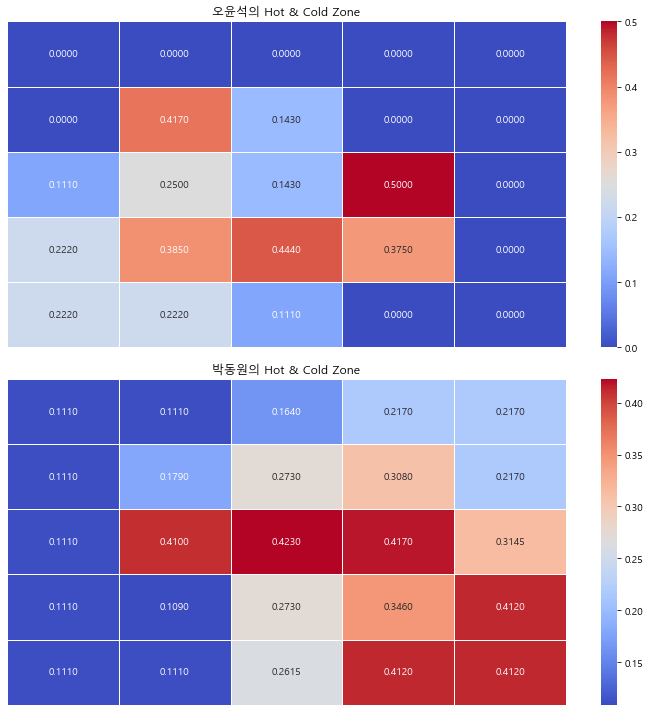

키플레이어는 팀의 최근 5경기 중 3경기 이상 출장 선수 중가장 타율이 높은 선수 입니다.


In [12]:
print('네이버 스포츠 - 야구 - 경기 전력 - 홈페이지 전부를 크롤링해서 시각화 해보았습니다')


display(df_info)
display(df_comparison)



import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



# 팀명과 승률, 타율, 평균자책점 추출
teams = df_add_color['팀명']
win_rates = df_add_color['승률']
batting_averages = df_add_color['타율']
era = df_add_color['평균자책'].astype(float)

# 시각화
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

# 승률 그래프
bars = ax[0].bar(teams, win_rates, color=df_add_color['color'])
ax[0].set_title('양팀 승률')
ax[0].set_ylabel('')

# 승률 바 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom')

# 타율 그래프
bars = ax[1].bar(teams, batting_averages, color=df_add_color['color'])
ax[1].set_title('양팀 타율')
ax[1].set_ylabel('')

# 타율 바 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom')

# 평균자책점 그래프
bars = ax[2].bar(teams, era, color=df_add_color['color'])
ax[2].set_title('양팀 평균자책점')
ax[2].set_ylabel('')

# 평균자책점 바 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    ax[2].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')


plt.tight_layout()
plt.show()
display(df)


display(df_pcomparison)
display(df_bcomparison)
display(df_kcomparison)

# 히트맵 그리기
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# 첫 번째 히트맵
sns.heatmap(away_hc_zone, cmap='coolwarm', annot=True, fmt='.4f', linewidths=0.5, xticklabels=False, yticklabels=False, ax=ax[0])
ax[0].set_title(f"{away_zone_data[-1]}의 Hot & Cold Zone")

# 두 번째 히트맵
sns.heatmap(home_hc_zone, cmap='coolwarm', annot=True, fmt='.4f', linewidths=0.5, xticklabels=False, yticklabels=False, ax=ax[1])
ax[1].set_title(f"{home_zone_data[-1]}의 Hot & Cold Zone")

plt.tight_layout()
plt.show()

print(keyplayer_mean)
